In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

from tensorflow.keras.callbacks import TensorBoard

In [2]:
# Clear any logs from previous runs
%rm -rf ./tensorboard_logs/

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Data Import and Pre-processing

In [3]:
import pandas as pd
import numpy as np

In [4]:
creepy = pd.read_pickle('./pickles/creepy.pickle')
noncreepy = pd.read_pickle('./pickles/noncreepy.pickle')

In [5]:
creepy

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended,selftext_sents_count,vec
0,0,gxsa0i,Do NOT Open Your Eyes... (Pt. 1),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
1,1,gxs6jf,Do NOT open your eyes. (The Beginning),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
2,2,gxrytp,My Best Friend Saw Bugs Under His Skin,It is hard for me to talk about my old friend ...,1,"[-19.201273, -13.715499, 24.393753, -33.97739,...",0.698135,"[0.6981347, -19.201273, -13.715499, 24.393753,...",81,"[0.6981347, -0.23705275, -0.16932714, 0.301157..."
3,3,gxrnj7,"I picked up a hitchhiker by mistake, now he's ...",They say the devil is in the details. Well th...,1,"[-60.77887, -33.726135, 119.47121, -95.021385,...",0.698135,"[0.6981347, -60.77887, -33.726135, 119.47121, ...",429,"[0.6981347, -0.14167568, -0.0786157, 0.2784876..."
4,4,gxrm8v,I'm tasked with killing nameless things out in...,“Any sign of ‘em yet?” \n\nI continued staring...,1,"[-22.785084, 14.806147, 26.129469, -24.832222,...",0.698135,"[0.6981347, -22.785084, 14.806147, 26.129469, ...",177,"[0.6981347, -0.12872928, 0.083650544, 0.147624..."
...,...,...,...,...,...,...,...,...,...,...
15367,15367,eihp0m,Hylophobia,*There is no cure for trauma. Once it enters t...,1,"[-51.169456, -5.836507, 70.7862, -111.05138, 7...",0.698135,"[0.6981347, -51.169456, -5.836507, 70.7862, -1...",447,"[0.6981347, -0.11447306, -0.013057062, 0.15835..."
15368,15368,eihmg7,I adopted my late sisters orphaned child. This...,"I knew Persephone would need time to adjust, b...",1,"[-22.327501, -34.563572, 39.197514, -72.437645...",0.698135,"[0.6981347, -22.327501, -34.563572, 39.197514,...",246,"[0.6981347, -0.0907622, -0.14050232, 0.1593394..."
15369,15369,eihgtp,My first paranormal experience!!,"This isnt much, but this is surely the first u...",1,"[-4.7810946, 0.12821773, 2.941056, -3.949329, ...",0.698135,"[0.6981347, -4.7810946, 0.12821773, 2.941056, ...",12,"[0.6981347, -0.39842454, 0.010684811, 0.245088..."
15370,15370,eigzgj,I met the demon under my bed... Its not what I...,"Okay. for context, this story started about a ...",1,"[-1.7662485, -4.471965, 8.116567, -12.409156, ...",0.698135,"[0.6981347, -1.7662485, -4.471965, 8.116567, -...",30,"[0.6981347, -0.05887495, -0.1490655, 0.2705522..."


In [6]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'vec'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'vec'].copy()

In [7]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))
creepy_features.shape

(15372, 769)

In [8]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))
noncreepy_features.shape

(22474, 769)

In [9]:
creepy_features.shape[0]

15372

In [10]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472 -0.23705275 -0.16932714 ...  0.22444913 -0.20354605
  -0.08335517]
 ...
 [ 0.69813472 -0.06071103  0.02235722 ...  0.10523307 -0.29174414
  -0.14749481]
 [ 0.69813472  0.14904401 -0.10234425 ... -0.13638787  0.24349198
   0.0390255 ]
 [ 0.69813472 -0.24383056 -0.36296186 ...  0.32824722 -0.14198837
  -0.42668518]] [1. 1. 1. ... 0. 0. 0.]


In [11]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [12]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[ 0.69813472  0.05087078 -0.17453498 ... -0.10480397 -0.00878134
  -0.02162955]
 [ 0.69813472  0.01022636 -0.02600729 ...  0.2258952  -0.11448984
   0.0233674 ]
 [ 0.69813472  0.06874519 -0.01141187 ...  0.04425691 -0.2106467
  -0.09333058]
 ...
 [ 0.69813472 -0.1532692  -0.02440793 ...  0.14036703  0.00953849
   0.07714657]
 [ 1.10194004 -0.21753943 -0.20378701 ...  0.08343509  0.14993337
   0.17935309]
 [ 0.69813472  0.29268453  0.09761263 ... -0.05415852 -0.49108347
  -0.5703575 ]] [0. 1. 0. ... 1. 0. 1.]


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.51793901 0.40268144 ... 0.47184547 0.52893419 0.43782805]
 [0.         0.5063239  0.45227568 ... 0.57464027 0.49058261 0.45035605]
 [0.         0.52304705 0.45714918 ... 0.51817968 0.45569642 0.41786513]
 ...
 [0.         0.45960116 0.45280972 ... 0.54805463 0.53558072 0.46532919]
 [0.04952086 0.44123442 0.39291401 ... 0.53035785 0.58651669 0.49378542]
 [0.         0.58704303 0.49355308 ... 0.48758815 0.35395254 0.2850518 ]] [0. 1. 0. ... 1. 0. 1.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [14]:
scaled_features[:,0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.04952086,
       0.        ])

In [15]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [16]:
import tensorflow as tf
from tensorflow import keras

# Model here

In [16]:
model = keras.Sequential([
#     keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dropout (Dropout)            (None, 303)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38912     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [18]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.000959, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [19]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir tensorboard_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5000WARNING:tensorflow:From /Users/anthony/Documents/GitHub/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 3s 3ms/step - loss: 0.4054 - accuracy: 0.8001 - val_loss: 0.3031 - val_accuracy: 0.8723
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2622 - accuracy: 0.8973 - val_loss: 0.3511 - val_accuracy: 0.8755
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2640 - accuracy: 0.8944 - val_loss: 0.2416 - val_accuracy: 0.9010
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2841 - accuracy: 0.8798 - val_loss: 0.3652 - val_accuracy: 0.8445


Reusing TensorBoard on port 6007 (pid 52840), started 0:01:56 ago. (Use '!kill 52840' to kill it.)

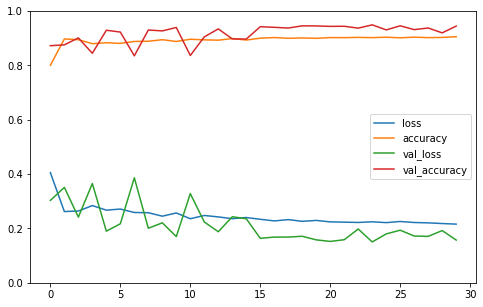

In [20]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()


In [21]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9436


[0.16067270934581757, 0.9435526728630066]

In [22]:
model.save('./models/self-tuned-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/self-tuned-model/assets


# Tensorboard Hyperparameter Tuning

In [17]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
# Clear any logs from previous runs
%rm -rf ./tf_tuner_logs/

In [19]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.layers import Dense, Dropout

In [20]:
HP_NUM_UNITS = hp.HParam('num_units', hp.IntInterval(8, 512))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_NUM_LAYERS = hp.HParam('n_layers', hp.IntInterval(2, 6))
HP_LR = hp.HParam('learning rate', hp.RealInterval(0.0008, 0.001))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('tf_tuner_logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER, HP_NUM_LAYERS, HP_LR],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [21]:
def train_test_model(hparams):
    model = keras.Sequential()
    model.add(Dense(units = hparams[HP_NUM_UNITS], input_shape = (769,), activation = 'relu'))
    
    for i in range(hparams[HP_NUM_LAYERS]):
        model.add(Dense(units = hparams[HP_NUM_UNITS], activation = 'relu'))
        model.add(Dropout(hparams[HP_DROPOUT]))
        
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=hparams[HP_LR]), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid)) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

In [22]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [23]:
session_num = 0
for num_layers in tf.cast(tf.linspace(HP_NUM_LAYERS.domain.min_value, HP_NUM_LAYERS.domain.max_value, 2), tf.int64):
    for num_units in tf.cast(tf.linspace(HP_NUM_UNITS.domain.min_value, HP_NUM_UNITS.domain.max_value, 2), tf.int64):
        for dropout_rate in tf.linspace(HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value, 6):
            for optimizer in HP_OPTIMIZER.domain.values:
                for lr in tf.linspace(HP_LR.domain.min_value, HP_LR.domain.max_value, 3):
                    hparams = {
                        HP_NUM_LAYERS: num_layers.numpy(),
                        HP_NUM_UNITS: num_units.numpy(),
                        HP_DROPOUT: dropout_rate.numpy(),
                        HP_OPTIMIZER: optimizer,
                        HP_LR: lr.numpy()
                    }
                    run_name = "run-%d" % session_num
                    print('--- Starting trial: %s' % run_name)
                    print({h.name: hparams[h] for h in hparams})
                    run('tf_tuner_logs/hparam_tuning/' + run_name, hparams)
                    session_num += 1



--- Starting trial: run-0
{'n_layers': 2, 'num_units': 8, 'dropout': 0.0, 'optimizer': 'adam', 'learning rate': 0.0008}
178/178 [==============================] - 0s 753us/step - loss: 0.6717 - accuracy: 0.6035
--- Starting trial: run-1
{'n_layers': 2, 'num_units': 8, 'dropout': 0.0, 'optimizer': 'adam', 'learning rate': 0.0009}
178/178 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8970
--- Starting trial: run-2
{'n_layers': 2, 'num_units': 8, 'dropout': 0.0, 'optimizer': 'adam', 'learning rate': 0.001}
178/178 [==============================] - 0s 807us/step - loss: 0.3392 - accuracy: 0.8751
--- Starting trial: run-3
{'n_layers': 2, 'num_units': 8, 'dropout': 0.0, 'optimizer': 'sgd', 'learning rate': 0.0008}
178/178 [==============================] - 0s 552us/step - loss: 0.2735 - accuracy: 0.8989
--- Starting trial: run-4
{'n_layers': 2, 'num_units': 8, 'dropout': 0.0, 'optimizer': 'sgd', 'learning rate': 0.0009}
178/178 [==============================] 

In [24]:
%tensorboard --logdir tf_tuner_logs/hparam_tuning

##### 

# Real-world Test (r/shortscarystories and r/self)

In [1]:
import numpy as np
from tensorflow import keras
# model = keras.models.load_model('./models/self-tuned-model')
model = keras.models.load_model('./models/keras-tuner-tuned-model')

import spacy

# spacy.prefer_gpu()
# Must return True for GPU to work

nlp = spacy.load('en_core_web_lg')

In [2]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

text_creepy = """
Jeff the killers brother. Mc Nugget the killer. He ate so many chicken nuggets that he now craves chicken nuggets made of human flesh. So he kills and takes peoples flesh and makes them into chicken nuggies.
"""

text_non_creepy = """
Everything is incredibly hard for the moment.
I got fired from my dream job because of reforms in the team. I'm currently suffering from a back injury which messes with my physical and mental health a lot. And now my long term partner wants so breakup with me. All this in a span of less than a month...
I've been trying my best to keep my head up but when the nights grow longer, it's very difficult to stay positive and productive...
I feel lost and don't know what to do now...
"""

# need nlp and model
def sum_vec(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    comment_vec = sbert_model.encode(sentences)
    return np.sum(comment_vec, axis = 0)

In [3]:
from sklearn.preprocessing import MinMaxScaler
creepy_vec = np.concatenate(([np.log(673+1+0.01)],sum_vec(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(325+1+0.01)],sum_vec(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

model.predict(scaled_vecs)

array([[6.28291309e-05],
       [1.35453385e-11]], dtype=float32)

In [40]:
model

Failed

In [2]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_non_creepy)
for idx, sents in enumerate(doc.sents):
    pass
print(idx)

3


In [15]:
from tensorflow import keras
model = keras.models.load_model('./models/keras-tuner-tuned-model/')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 408)               314160    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                16360     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 344)               14104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 344)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 328)               113160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 328)               0

In [17]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir tensorboard_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000WARNING:tensorflow:From /Users/anthony/Documents/GitHub/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 3s 4ms/step - loss: 0.1151 - accuracy: 0.9583 - val_loss: 0.1168 - val_accuracy: 0.9602
Epoch 2/30
829/829 [==============================] - 3s 3ms/step - loss: 0.1131 - accuracy: 0.9596 - val_loss: 0.1133 - val_accuracy: 0.9609
Epoch 3/30
829/829 [==============================] - 3s 3ms/step - loss: 0.1130 - accuracy: 0.9587 - val_loss: 0.1568 - val_accuracy: 0.9292
Epoch 4/30
829/829 [==============================] - 2s 3ms/step - loss: 0.1203 - accuracy: 0.9550 - val_loss: 0.1278 - val_accuracy: 0.9554


Reusing TensorBoard on port 6007 (pid 52840), started 5:57:52 ago. (Use '!kill 52840' to kill it.)